In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [3]:
from urllib import request
file_url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
file = 'automobileEDA.csv'
request.urlretrieve(file_url , file )

('automobileEDA.csv', <http.client.HTTPMessage at 0x21382882e50>)

In [4]:
df = pd.read_csv(file)

In [5]:
df["price"]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

# Como apenas um parâmetro pode ajudar a prever o preço do carro?

Regressão Linear Simples
Modelagem
Para regressão linear simples, vamos considerar apenas o efeito dos anúncios da higway-mpg no preço. Antes de pular direto para a modelagem, vamos dar uma olhada na aparência dos dados.

Usamos matplotlib , uma biblioteca de plotagem Python popular para fazer um gráfico de dispersão.

Text(0, 0.5, 'Price')

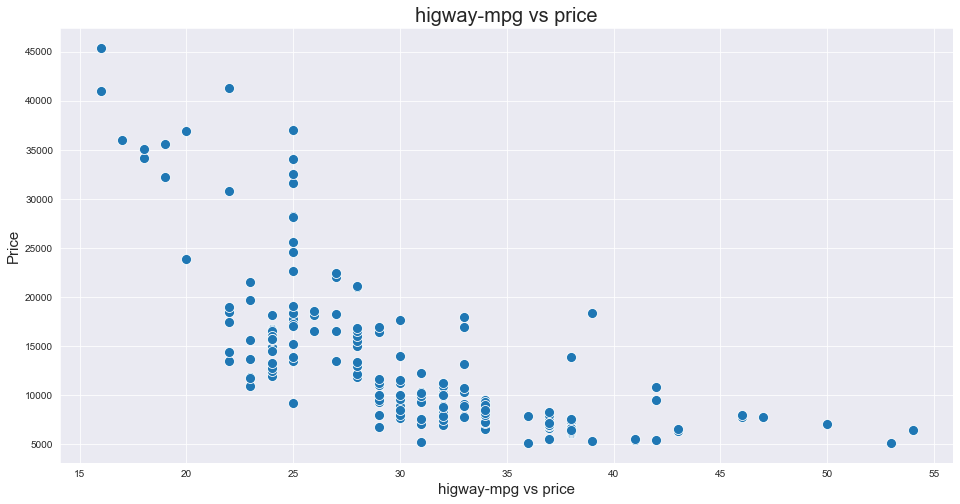

In [6]:

sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title("higway-mpg vs price", fontsize=20)
sns.scatterplot(x=df["highway-mpg"], y=df["price"], s=100)

plt.xlabel('higway-mpg vs price',fontsize=15)
plt.ylabel("Price",fontsize=15)



Quando se trata de regressão linear simples, uma excelente maneira de visualizar o ajuste do nosso modelo é usando gráficos de regressão.

Este gráfico mostrará uma combinação de pontos de dados dispersos (um gráfico de dispersão), bem como a linha de regressão linear ajustada passando pelos dados. Isso nos dará uma estimativa razoável da relação entre as duas variáveis, a força da correlação, bem como a direção (correlação positiva ou negativa).

Vamos visualizar a rodovia-mpg como potencial variável preditora de preço:

(0.0, 48165.55571388586)

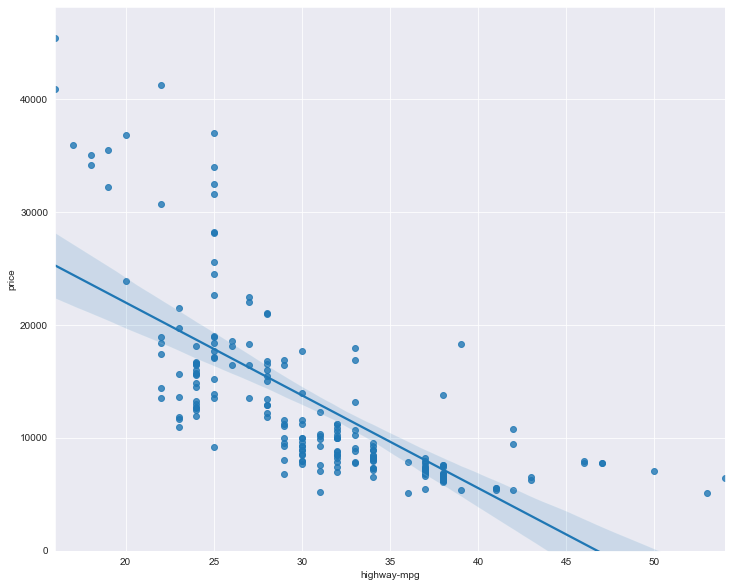

In [7]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Podemos ver neste gráfico que o preço está negativamente correlacionado com a higway-mpg, uma vez que a inclinação da regressão é negativa.

Uma coisa a ter em mente ao olhar para um gráfico de regressão é prestar atenção em quão dispersos os pontos de dados estão ao redor da linha de regressão. Isso lhe dará uma boa indicação da variância dos dados e se um modelo linear seria o melhor ajuste ou não. Se os dados estiverem muito longe da linha, esse modelo linear pode não ser o melhor modelo para esses dados.

<h4>Agora vamos carregar a livraria/módulos da regressão linear:</h4>

In [8]:
from sklearn.linear_model import LinearRegression # Ja tinha sido importado, so coloquei para mostrar o passo a passo

In [9]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [10]:
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model using highway-mpg:
lm.fit(X,Y)


LinearRegression()

In [11]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


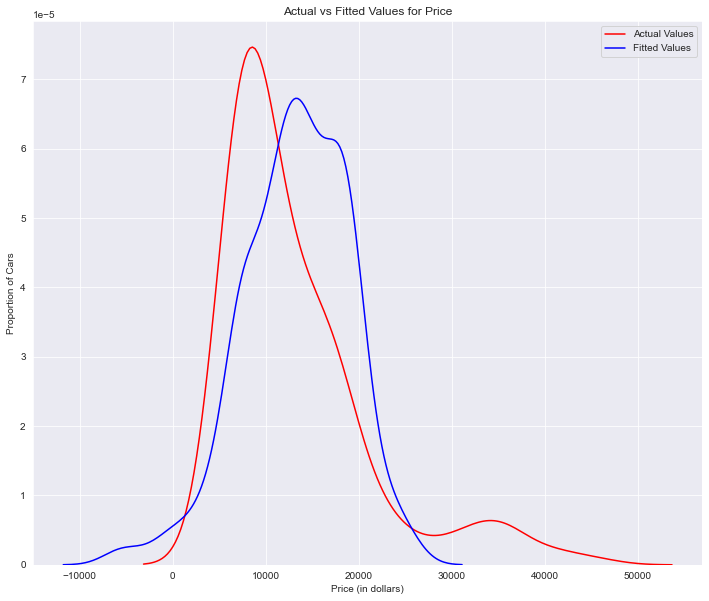

In [12]:

plt.figure(figsize=(width, height))


sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" )

plt.legend(["Actual Values","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()

In [13]:
# What is the value of the intercept (a)?

lm.intercept_

38423.305858157386

In [14]:
#What is the value of the slope (b)?( coeficiente de inclinação da reta)
lm.coef_

array([-821.73337832])

quem é o modelo linear estimado final que obtemos?
Como vimos acima, devemos obter um modelo linear final com a estrutura
 
Conectando os valores reais, obtemos:

Price = 38423.31 - 821.73 x highway-mpg

In [15]:
print("The linear model is: Y = {} + {}X".format(lm.intercept_, lm.coef_))

The linear model is: Y = 38423.305858157386 + [-821.73337832]X


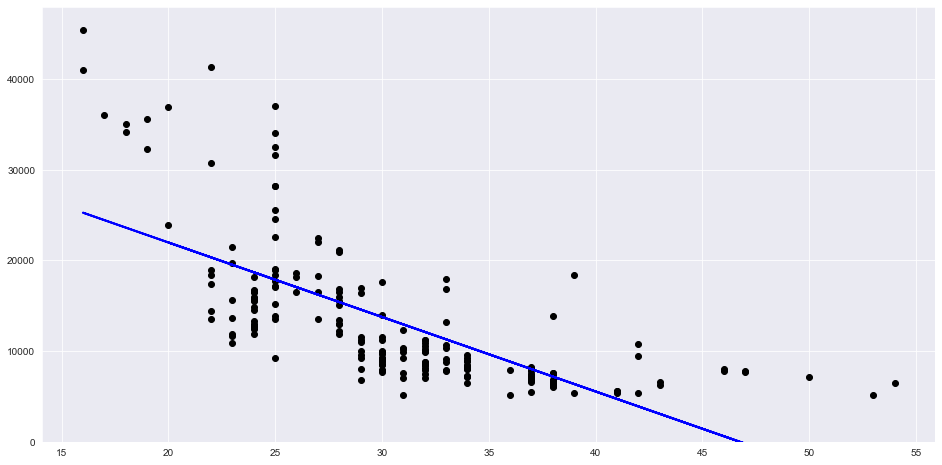

In [16]:

plt.figure(figsize=(16, 8))
plt.scatter(
    df["highway-mpg"],
    df['price'],
    c='black'
)
plt.plot(
    df['highway-mpg'],
    Yhat,
    c='blue',
    linewidth=2
)

plt.ylim(0,)

plt.show()

<h4>Avaliando a relevância do modelo<h4>
 para ver se o modelo é bom, precisamos olhar para o valor R² e o valor p de cada coeficiente.

In [17]:
X=df["highway-mpg"]
Y= df["price"]

X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.75e-31
Time:                        12:14:04   Log-Likelihood:                -2020.8
No. Observations:                 201   AIC:                             4046.
Df Residuals:                     199   BIC:                             4052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.842e+04   1843.391     20.844      

Olhando para ambos os coeficientes, temos um valor de p que é muito baixo (embora provavelmente não seja exatamente 0). Isso significa que existe uma forte correlação entre esses coeficientes e a meta (Vendas).

Então, olhando para o valor de R², temos 0,497. Portanto, cerca de 49,7% da variabilidade de preço é explicada pela higway-mpg. Isso é bom, mas definitivamente não é o melhor que podemos prever com precisão as vendas. Certamente, adicionar outras variáveis explicativas deve ter um certo impacto no preço.



<h4> observar se a linear se adapta bem, olhando os residuais<h4>
Uma boa maneira de visualizar a variância dos dados é usar um gráfico de resíduos.

O que é um resíduo?

A diferença entre o valor observado (y) e o valor previsto (Yhat) é chamada de resíduo (e). Quando olhamos para um gráfico de regressão, o resíduo é a distância do ponto de dados até a linha de regressão ajustada.

Então, o que é uma parcela residual?

Um gráfico de resíduos é um gráfico que mostra os resíduos no eixo y vertical e a variável independente no eixo x horizontal.

A que prestamos atenção quando olhamos para uma parcela residual?

Observamos a distribuição dos resíduos:

- Se os pontos em um gráfico de resíduos estiverem espalhados aleatoriamente ao redor do eixo x, então um modelo linear é apropriado para os dados.

Por que é que? Resíduos espalhados aleatoriamente significam que a variância é constante e, portanto, o modelo linear é um bom ajuste para esses dados.

C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


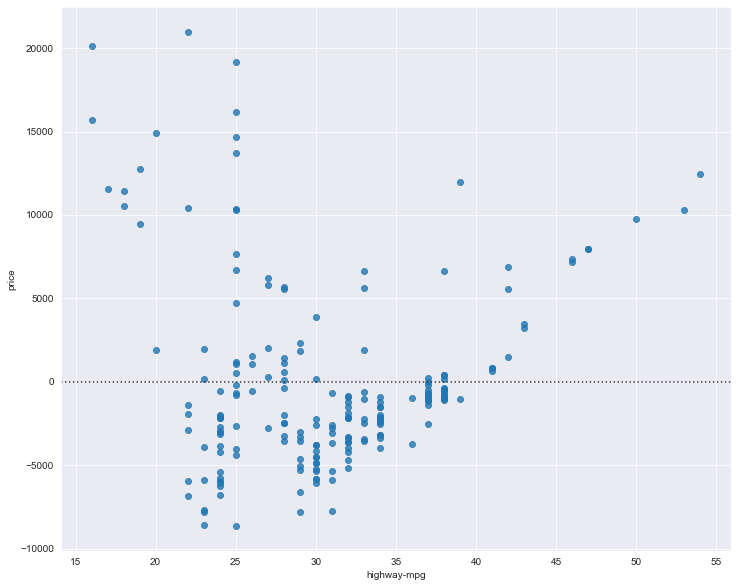

In [18]:
plt.figure(figsize=(12, 10))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

O que esse enredo está nos dizendo?

Podemos ver neste gráfico de resíduos que os resíduos não estão espalhados aleatoriamente ao redor do eixo x, levando-nos a acreditar que talvez um modelo não linear seja mais apropriado para esses dados.

# Vamos ver se uma regressão linear múltipla terá um desempenho melhor.


E se quisermos prever o preço do carro usando mais de uma variável?

Se quisermos usar mais variáveis ​​em nosso modelo para prever o preço do carro, podemos usar a Regressão Linear Múltipla. A regressão linear múltipla é muito semelhante à regressão linear simples, mas esse método é usado para explicar a relação entre uma variável de resposta contínua (dependente) e duas ou mais variáveis ​​preditoras (independentes). A maioria dos modelos de regressão do mundo real envolve vários preditores.
Ilustraremos a estrutura usando quatro variáveis ​​preditoras, mas esses resultados podem ser generalizados para qualquer número inteiro:

Da seção anterior, sabemos que outros bons preditores de preço podem ser:Potência,Peso médio, Tamanho do motor e Highway-mpg

Vamos desenvolver um modelo usando essas variáveis como variáveis preditoras.


In [19]:

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [20]:
#Ajuste o modelo linear usando as quatro variáveis ​​acima mencionadas.

lm.fit(Z,df["price"])



LinearRegression()

In [21]:


lm.intercept_

-15806.624626329198

In [22]:

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [23]:
lm.predict([[111,2548,130,27 ]])

array([13699.11161184])

Qual é a função linear que obtemos neste exemplo?

<h4>Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg<h4>

<h4>Avaliando a relevância do modelo<h4>
Como você deve esperar, o procedimento aqui é muito semelhante ao que fizemos na regressão linear simples.

 Primeiro vamos comparar os valores do p-valor individualmente, para ver se todos possuem uma correlação forte

In [26]:
import scipy.stats

In [27]:

pearson_coef, p_value = scipy.stats.pearsonr(df["highway-mpg"],y= df["price"])

print(" Para a variavel highway-mpg pearson_coef {} e p-value {}".format(pearson_coef, p_value))

 Para a variavel highway-mpg pearson_coef -0.7046922650589529 e p-value 1.7495471144477352e-31


In [28]:
pearson_coef, p_value = scipy.stats.pearsonr(df["curb-weight"],y= df["price"])

print(" Para a variavel curb-weight pearson_coef {} e p-value {}".format(pearson_coef, p_value))

 Para a variavel curb-weight pearson_coef 0.8344145257702846 e p-value 2.1895772388936914e-53


In [29]:
pearson_coef, p_value = scipy.stats.pearsonr(df["engine-size"],y= df["price"])

print(" Para a variavel engine-size pearson_coef {} e p-value {}".format(pearson_coef, p_value))

 Para a variavel engine-size pearson_coef 0.8723351674455185 e p-value 9.265491622198389e-64


In [30]:
pearson_coef, p_value = scipy.stats.pearsonr(df["horsepower"],y= df["price"])

print(" Para a variavel horsepower pearson_coef {} e p-value {}".format(pearson_coef, p_value))

 Para a variavel horsepower pearson_coef 0.809574567003656 e p-value 6.369057428259557e-48


Entao utilizando o metodo pearson podemos observar que as variaveis estao fortemente relacionadas com o preço, individualmente falando

In [31]:
Y_hat = lm.predict(Z)

In [32]:

import statsmodels.api as sm

Z=sm.add_constant(Z)

model=sm.OLS(Y,Z).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.33e-69
Time:                        12:20:25   Log-Likelihood:                -1923.2
No. Observations:                 201   AIC:                             3856.
Df Residuals:                     196   BIC:                             3873.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.581e+04   4388.993     -3.601      

Como você pode ver, o R² é muito superior ao da regressão linear simples, com valor de 0,809!

Além disso, a estatística F é 208. Isso é muito maior que 1, e como nosso conjunto de dados é bastante pequeno (apenas 201 pontos de dados), demonstra que há uma forte relação entre as variáveis ​​(características do carro) e o preço.

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


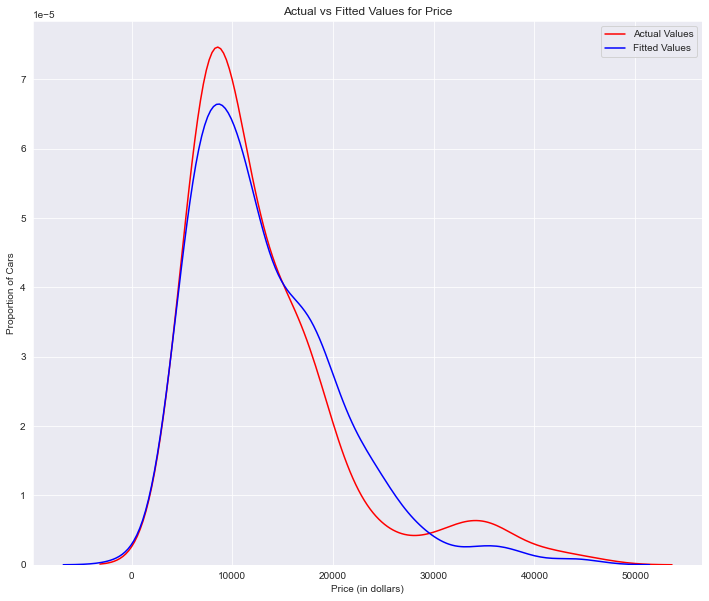

In [223]:

Y_hat= lm.predict(Z)

plt.figure(figsize=(width, height))


sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" )

plt.legend(["Actual Values","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()

<h2>3. Regressão Polinomial e Pipelines</h2>



Vimos anteriormente que um modelo linear não fornece o melhor ajuste ao usar "highway-mpg" como variável preditora. Vamos ver se podemos tentar ajustar um modelo polinomial aos dados.

Usaremos a seguinte função para plotar os dados:

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15 ,55 , 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()

In [34]:
X

,const,highway-mpg
0,1.0,27
1,1.0,27
2,1.0,26
3,1.0,30
4,1.0,22
...,...,...
196,1.0,28
197,1.0,25
198,1.0,23
199,1.0,27


In [45]:
b=df["highway-mpg"]

In [51]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(b,Y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [52]:
p(15)

44258.161618726415

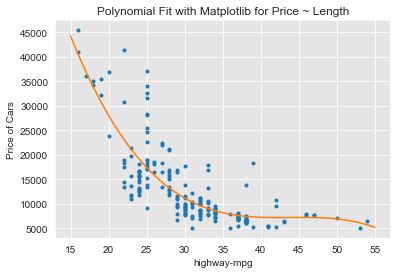

In [53]:
PlotPolly(p,b,Y, 'highway-mpg')

In [54]:
import statsmodels.api as sm


model=sm.OLS(Y,p(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     411.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.38e-50
Time:                        12:30:30   Log-Likelihood:                -1977.1
No. Observations:                 201   AIC:                             3958.
Df Residuals:                     199   BIC:                             3965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6.705e-16      0.006   1.19e-13      1.0

In [55]:
from sklearn.metrics import mean_squared_error

x=df['highway-mpg'] # Pois o X ja esta com a constante, entao temos que importar o x da tabela novamente como 'x'
mean_squared_error(Y, p(x))

20474146.426361218

We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [56]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [57]:
x1 = df['horsepower']
y1 = df['price']

In [78]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x1, y1,3)
ph = np.poly1d(f)
print(ph)

           3         2
-0.004377 x + 2.044 x - 113.3 x + 7211


In [79]:
def PlotPolly_horsepower(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(50 ,250 , 150)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()

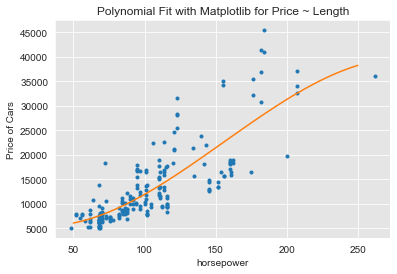

In [80]:
PlotPolly_horsepower(ph, x1, y1, 'horsepower')

In [81]:
from sklearn.metrics import r2_score
r_squared = r2_score(y1, ph(x1))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6627880537087625


We can say that ~66.27 % of the variation of price is explained by this polynomial fit.

In [82]:
mean_squared_error(y1, ph(x1))

21190956.847144

In [83]:
import statsmodels.api as sm


model= sm.OLS(y1,ph(x1)).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              2039.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):                   7.27e-107
Time:                        12:38:22   Log-Likelihood:                         -1980.5
No. Observations:                 201   AIC:                                      3963.
Df Residuals:                     200   BIC:                                      3966.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<h4> PIPELINE <h4>

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [85]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=4)), ('model',LinearRegression())]

In [86]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('model', LinearRegression())])

In [87]:
Z = Z.astype(float)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('model', LinearRegression())])

In [88]:
ypipe=pipe.predict(Z)

In [89]:
ypipe

array([13315.80330477, 13315.80330477, 17387.47836147, 13113.05997759,
       18402.50696045, 15659.59762465, 17368.0718554 , 19581.01651038,
       20944.42838564, 13961.21795524, 13961.21795524, 18287.47849253,
       17864.37102444, 21163.0820757 , 31363.98919074, 39128.56249496,
       35805.10047215,  5379.23900324,  4936.35835402,  3590.42135957,
        7553.95134912,  7390.59428232,  8485.90337166,  6521.03045521,
        6303.59957236,  6303.59957236,  9652.76694699, 11418.23330102,
       13324.29003197,  7434.55392958,  7225.91553107,  3242.53326301,
        6574.21358929,  6715.20378051,  7234.60684096,  7363.66903155,
        8952.94420149,  9470.42813653,  9601.55794008, 10067.39637666,
       14856.46151565, 12359.95011567,  7641.91963243, 12506.98337967,
       33784.76777616, 33784.76777616, 36049.4637735 ,  4774.11353385,
        7353.74514221,  7314.15836766,  7013.58816825,  6976.62669945,
       12314.60363396, 12314.60363396, 10279.77527556, 16304.92235339,
      

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


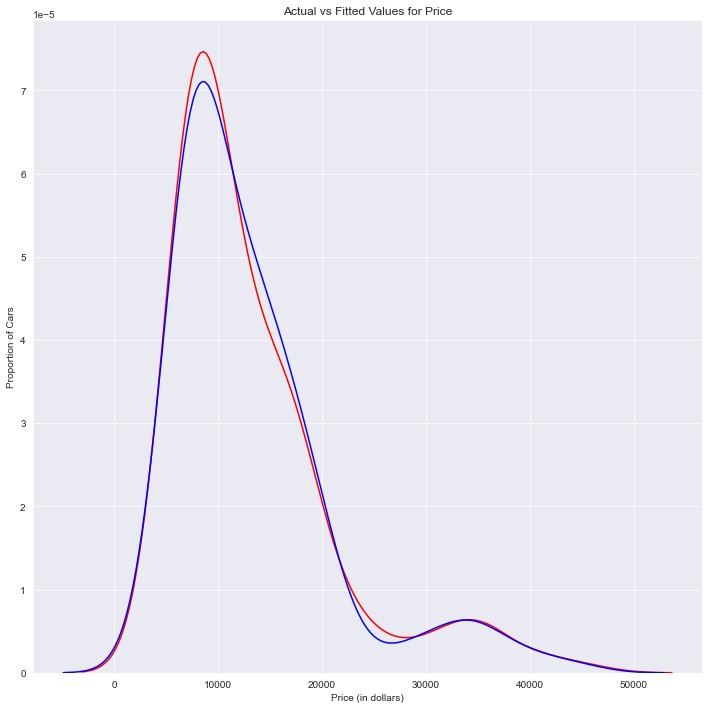

In [90]:
plt.figure(figsize=(12,12))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()